In [1]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("images_recognition/train_test_17"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'images_recognition/train_test_17'.
There are 7 directories and 0 images in 'images_recognition/train_test_17\test'.
There are 0 directories and 2 images in 'images_recognition/train_test_17\test\G'.
There are 0 directories and 2 images in 'images_recognition/train_test_17\test\GO'.
There are 0 directories and 3 images in 'images_recognition/train_test_17\test\GOW'.
There are 0 directories and 2 images in 'images_recognition/train_test_17\test\GW'.
There are 0 directories and 2 images in 'images_recognition/train_test_17\test\O'.
There are 0 directories and 3 images in 'images_recognition/train_test_17\test\OW'.
There are 0 directories and 2 images in 'images_recognition/train_test_17\test\W'.
There are 7 directories and 0 images in 'images_recognition/train_test_17\train'.
There are 0 directories and 5 images in 'images_recognition/train_test_17\train\G'.
There are 0 directories and 8 images in 'images_recognition/train_test_17\train\GO'.
There 

In [2]:
# Create training and test directory paths
train_dir = "images_recognition/train_test_17/train"
test_dir = "images_recognition/train_test_17/test"

In [3]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                         label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                         batch_size=2)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        shuffle=False,
                                                        batch_size=2)

Found 59 files belonging to 7 classes.
Found 16 files belonging to 7 classes.


In [4]:
class_names = test_data.class_names
class_names

['G', 'GO', 'GOW', 'GW', 'O', 'OW', 'W']

In [14]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [6]:
# Creating data augmentation layer
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal")
], name ="data_augmentation")

In [7]:
# Function to plot loss cureves
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.

  Args:
    history: Tensorflow History object.
  
  Returns:
    Plot of training/validation loss and accuracy metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

In [8]:
# Create a confusion metrics

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):


  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)


  # Set labels to be claseses
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [26]:
# EfficientNetB2
# Setup the base model
base_model = tf.keras.applications.EfficientNetB2(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) 
x = base_model(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(7, activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

# Compile
model.compile(loss="categorical_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model = model.fit(train_data,
                               epochs=14,
                               validation_data=test_data,
                               validation_steps=len(test_data))
                               # callbacks=[early_stopping])

Epoch 1/14
30/30 [==============================] - 9s 119ms/step - loss: 1.9715 - accuracy: 0.1695 - val_loss: 1.7248 - val_accuracy: 0.3750
Epoch 2/14
30/30 [==============================] - 2s 81ms/step - loss: 1.6011 - accuracy: 0.3898 - val_loss: 1.5279 - val_accuracy: 0.3125
Epoch 3/14
30/30 [==============================] - 2s 79ms/step - loss: 1.4598 - accuracy: 0.4746 - val_loss: 1.4578 - val_accuracy: 0.3750
Epoch 4/14
30/30 [==============================] - 3s 86ms/step - loss: 1.3540 - accuracy: 0.4407 - val_loss: 1.3969 - val_accuracy: 0.4375
Epoch 5/14
30/30 [==============================] - 2s 82ms/step - loss: 1.2594 - accuracy: 0.5085 - val_loss: 1.3228 - val_accuracy: 0.4375
Epoch 6/14
30/30 [==============================] - 2s 72ms/step - loss: 1.2281 - accuracy: 0.4576 - val_loss: 1.2641 - val_accuracy: 0.5000
Epoch 7/14
30/30 [==============================] - 2s 74ms/step - loss: 1.1539 - accuracy: 0.5593 - val_loss: 1.2411 - val_accuracy: 0.5000
Epoch 8/14
3

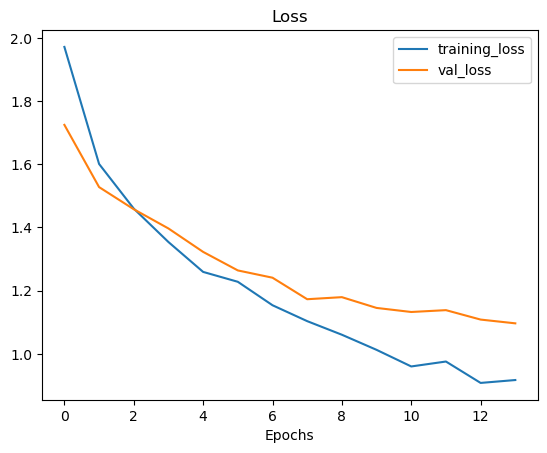

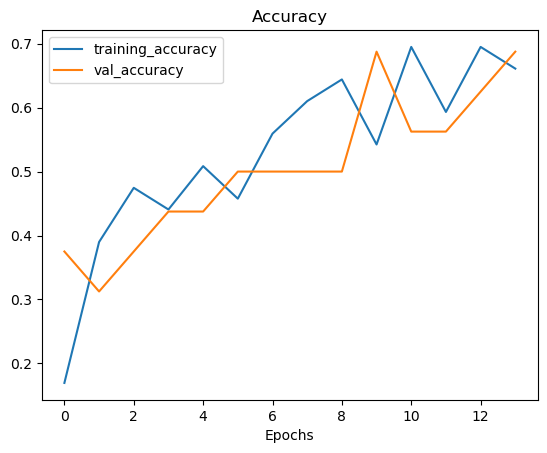

In [27]:
plot_loss_curves(history_model)

In [28]:
# Making predictions with our best model so far
y_probs = model.predict(test_data)

# View the first predcitons
y_probs[:5]

array([[0.12134054, 0.16263612, 0.06628589, 0.0040511 , 0.479682  ,
        0.09551912, 0.07048526],
       [0.6874544 , 0.01858488, 0.15353915, 0.0696241 , 0.02708022,
        0.00649795, 0.03721931],
       [0.00869643, 0.269074  , 0.63473094, 0.06358511, 0.00551548,
        0.01408603, 0.004312  ],
       [0.04618514, 0.41148415, 0.37823147, 0.04182191, 0.05073053,
        0.04509215, 0.02645473],
       [0.015523  , 0.24828728, 0.6095916 , 0.0550072 , 0.01752683,
        0.0415622 , 0.01250186]], dtype=float32)

In [29]:
y_preds = y_probs.argmax(axis=1)
y_preds

array([4, 0, 2, 1, 2, 4, 2, 1, 3, 4, 5, 5, 5, 5, 6, 6], dtype=int64)

In [30]:
# unbatching test data batch to get y_labels
y_labels = []
for images, labels in test_data.unbatch():
  y_labels.append(labels.numpy().argmax())
y_labels[:10]

[0, 0, 1, 1, 2, 2, 2, 3, 3, 4]

In [31]:
import numpy as np

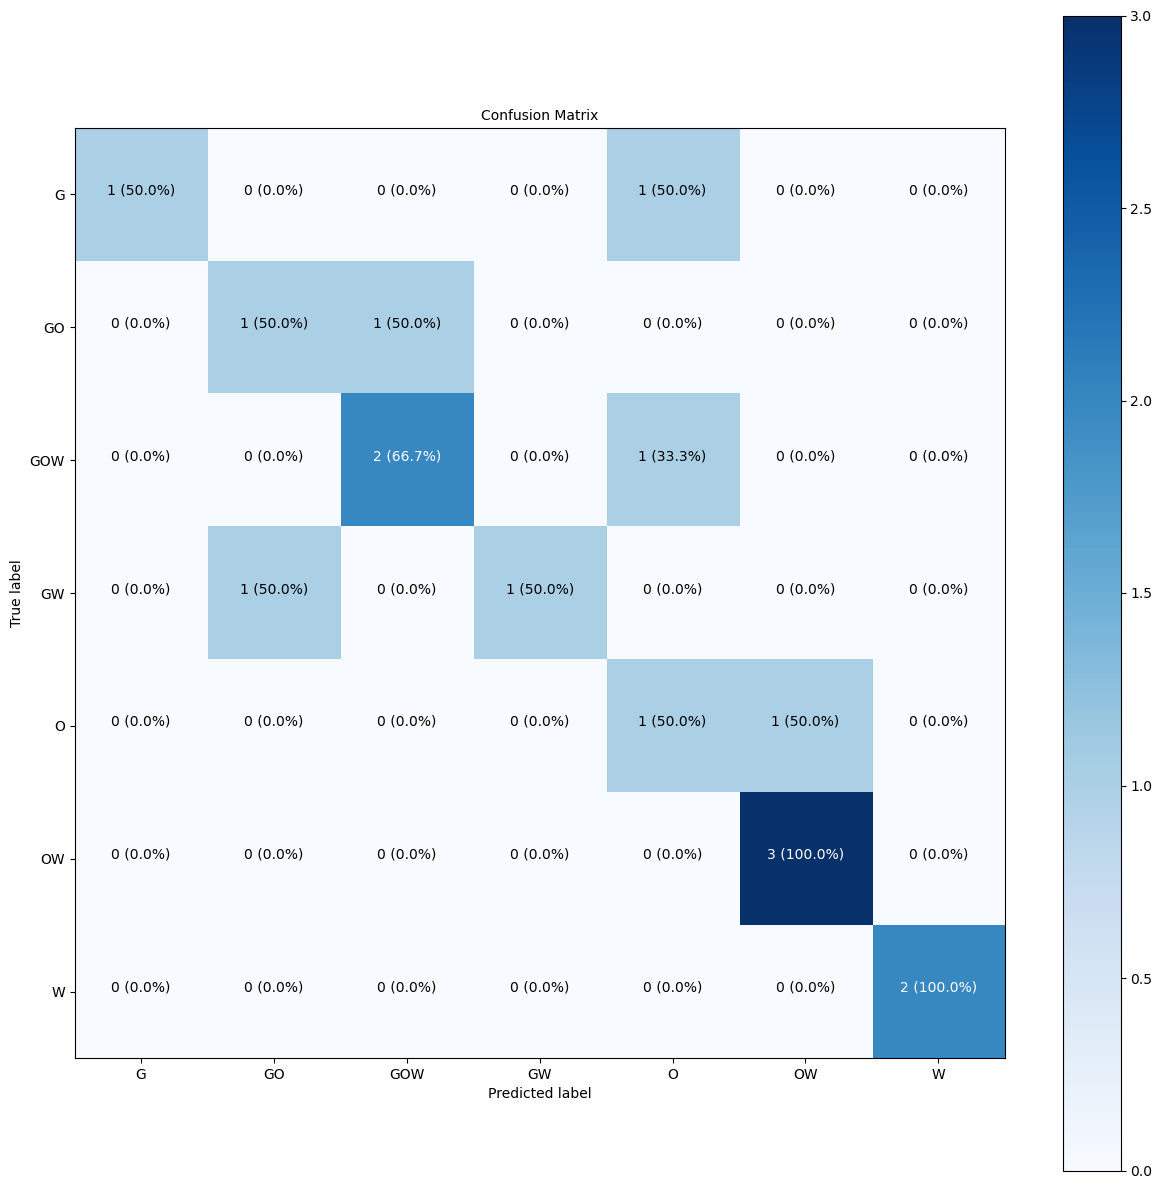

In [32]:
# make a good confusion matrix
make_confusion_matrix(y_true=y_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [33]:
# Saving model to Goodgle Drive
save_dir = "./flow_type_model_channel_3_final/"
model.save(save_dir)

INFO:tensorflow:Assets written to: ./flow_type_model_channel_3_final/assets


In [30]:
# # Saving model in HDF5 format
# save_dir = "./flow_type_model_channel_3_final/"
# tf.saved_model.save(model, save_dir)

INFO:tensorflow:Assets written to: ./flow_type_model_channel_2/assets


INFO:tensorflow:Assets written to: ./flow_type_model_channel_2/assets


In [35]:
# Load model
loaded_model = tf.keras.models.load_model(save_dir)

In [36]:
loaded_model.evaluate(test_data)

8/8 [==============================] - 2s 70ms/step - loss: 1.0966 - accuracy: 0.6875


[1.0966153144836426, 0.6875]

In [38]:
# Get all of the image file paths in the test dataset
filepaths = []
for filepath in test_data.list_files("images_recognition/train_test_17/test/*/*.png",
                                      shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]


[b'images_recognition\\train_test_17\\test\\GOW\\GOW_09_testPoint.datAcc.ch_3.png',
 b'images_recognition\\train_test_17\\test\\GOW\\GOW_100b_testPoint.datAcc.ch_3.png',
 b'images_recognition\\train_test_17\\test\\GOW\\GOW_149_testPoint.datAcc.ch_3.png',
 b'images_recognition\\train_test_17\\test\\GO\\GO_01b_testPoint.datAcc.ch_3.png',
 b'images_recognition\\train_test_17\\test\\GO\\GO_03_testPoint.datAcc.ch_3.png',
 b'images_recognition\\train_test_17\\test\\GW\\GW_501_testPoint.datAcc.ch_3.png',
 b'images_recognition\\train_test_17\\test\\GW\\GW_502_testPoint.datAcc.ch_3.png',
 b'images_recognition\\train_test_17\\test\\G\\G_00_testPoint.datAcc.ch_3.png',
 b'images_recognition\\train_test_17\\test\\G\\G_05_testPoint.datAcc.ch_3.png',
 b'images_recognition\\train_test_17\\test\\OW\\OW_06b_testPoint.datAcc.ch_3.png']

In [39]:
#Create a DataFrame of different parameters for each of the test images
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": y_preds,
                        "pred_conf": y_probs.max(axis=1),
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in y_preds]})
pred_df

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname
0,b'images_recognition\\train_test_17\\test\\GOW...,0,4,0.479682,G,O
1,b'images_recognition\\train_test_17\\test\\GOW...,0,0,0.687454,G,G
2,b'images_recognition\\train_test_17\\test\\GOW...,1,2,0.634731,GO,GOW
3,b'images_recognition\\train_test_17\\test\\GO\...,1,1,0.411484,GO,GO
4,b'images_recognition\\train_test_17\\test\\GO\...,2,2,0.609592,GOW,GOW
5,b'images_recognition\\train_test_17\\test\\GW\...,2,4,0.544718,GOW,O
6,b'images_recognition\\train_test_17\\test\\GW\...,2,2,0.876113,GOW,GOW
7,b'images_recognition\\train_test_17\\test\\G\\...,3,1,0.417145,GW,GO
8,b'images_recognition\\train_test_17\\test\\G\\...,3,3,0.426137,GW,GW
9,b'images_recognition\\train_test_17\\test\\OW\...,4,4,0.421191,O,O


In [40]:
#Find out in our DataFrame which predictions are wrong
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df

,img_path,y_true,y_pred,pred_conf,y_true_classname,y_pred_classname,pred_correct
0,b'images_recognition\\train_test_17\\test\\GOW...,0,4,0.479682,G,O,False
1,b'images_recognition\\train_test_17\\test\\GOW...,0,0,0.687454,G,G,True
2,b'images_recognition\\train_test_17\\test\\GOW...,1,2,0.634731,GO,GOW,False
3,b'images_recognition\\train_test_17\\test\\GO\...,1,1,0.411484,GO,GO,True
4,b'images_recognition\\train_test_17\\test\\GO\...,2,2,0.609592,GOW,GOW,True
5,b'images_recognition\\train_test_17\\test\\GW\...,2,4,0.544718,GOW,O,False
6,b'images_recognition\\train_test_17\\test\\GW\...,2,2,0.876113,GOW,GOW,True
7,b'images_recognition\\train_test_17\\test\\G\\...,3,1,0.417145,GW,GO,False
8,b'images_recognition\\train_test_17\\test\\G\\...,3,3,0.426137,GW,GW,True
9,b'images_recognition\\train_test_17\\test\\OW\...,4,4,0.421191,O,O,True


In [41]:
# Saving file
pred_df.to_excel("flow_type_predictions_channel_3_final.xlsx", index=False)